In [1]:
import sys
import os
os.chdir("..")
import numpy as np
from Tox21_extended_experiment_helper import load_data

In [2]:
r = load_data()
labels = r['labels']
train_targets = r['train_targets'].values
test_targets = r['test_targets'].values

In [3]:
from qdependency import get_Q
Q = get_Q(train_targets, ignore_nan=True)
Q = np.abs(Q)

D:\Envs\LocallyLinearManifold\locally-linear-manifold\1_Notebooks\Tox21_extended_wFP\label_partitioning\qdependency.py:78: RuntimeWarning: divide by zero encountered in log
  Q[i,j]=np.tanh((np.log(b)-np.log(a))/c)


In [4]:
for i in range(len(Q)):
    Q[i,i]=1.

In [5]:
a=Q[np.triu_indices(Q.shape[0], k=1, m=Q.shape[1])]

In [6]:
np.argsort(a)

array([ 530, 1808,  360, ...,  622, 2155, 1301], dtype=int64)

In [7]:
len(a)

2278

In [8]:
class UniformSubsetPartition():
    def __init__(self,X, set_size=4):
        # X is a symmetric similarity matrix
        self.X = X
        self.set_size=set_size
        self.n = X.shape[0]
        self.ind = np.triu_indices(self.n, k=1, m=self.n)
        self.distances = X[self.ind]
        self.sort_ind = np.argsort(self.distances)[::-1]
        self.ind = [self.ind[0][self.sort_ind],
                    self.ind[1][self.sort_ind]]
        self.partition=[]
        self.fitted=[] 
        self.final_partition=[]
        self.final_fitted=[]
        
    def fit(self):
        ptr = 0
        finished=False
        while not finished:
            self.fit_step(ptr)
            self.update_final_partition()
            ptr=ptr+1
            if len(self.fitted)==self.n:
                finished=True
        self.final_merge()
        return self.final_partition
        #Final merges
    
    def fit_step(self,ptr):
        #update temp partition with indices at ptr
        head, tail = self.ind[0][ptr], self.ind[1][ptr]
        final_fitted=np.isin([head, tail], self.final_fitted)
        if np.any(final_fitted):
            return None
        fitted=np.isin([head,tail], self.fitted)
        if np.all(fitted):
            #Combine head and tail partitions
            part_idx_head = self.find_part_idx(head)
            part_idx_tail = self.find_part_idx(tail)
            if part_idx_head!=part_idx_tail:
                self.combine_part_ind(part_idx_head, 
                                      part_idx_tail)
        elif np.any(fitted):
            #Add head/tail to head/tail partition
            if fitted[0]:
                part_idx = self.find_part_idx(head)
                self.add_to_set(part_idx,tail)
            else:
                part_idx = self.find_part_idx(tail)
                self.add_to_set(part_idx, head)
        else: 
            #Add new set with head/tail
            self.add_new_set([head,tail])
    
    def find_part_idx(self, add):
        #Find which partition index a node belongs to 
        for i in range(len(self.partition)):
            if np.isin(add,self.partition[i]):
                return i
    
    def combine_part_ind(self, part_idx1, part_idx2):
        ind = np.setdiff1d(
            list(range(len(self.partition))), 
            [part_idx1, part_idx2])
        if len(ind)>0:
            partition = [self.partition[j] for j in ind]
        else:
            partition=[]
        part=list(np.concatenate([
            self.partition[part_idx1],
            self.partition[part_idx2]]))
        partition.append(part)
        self.partition=partition
    
    def add_to_set(self, part_idx, add):
        self.partition[part_idx].extend([add])
        self.fitted.extend([add])
    
    def add_new_set(self, add_list):
        self.partition.append(add_list)
        self.fitted.extend(add_list)
    
    def update_final_partition(self):
        retain_part=[]
        for i in range(len(self.partition)):
            if len(self.partition[i])>=self.set_size:
                self.final_partition.append(
                    self.partition[i])
                self.final_fitted.extend(
                    self.partition[i])
            else:
                retain_part.append(i)
        self.partition = [self.partition[j] for j in retain_part] 

    def final_merge(self):
        for i in range(len(self.partition)):
            self.final_partition.append(self.partition[i])

In [9]:
a=UniformSubsetPartition(Q)

In [10]:
label_partition=a.fit()
label_partition


[[51, 65, 9, 62],
 [23, 37, 64, 41],
 [38, 57, 21, 59, 30],
 [31, 42, 50, 15],
 [19, 61, 33, 67],
 [46, 66, 28, 47],
 [26, 27, 44, 45],
 [24, 25, 22, 11],
 [6, 18, 58, 56],
 [5, 8, 29, 7],
 [12, 16, 14, 53],
 [32, 35, 43, 34],
 [54, 55, 52, 60],
 [13, 36, 3, 39],
 [10, 17, 48, 49, 40],
 [1, 2, 0],
 [20, 63, 4]]

In [11]:
import dill as pickle
with open("learned_label_partitioning_q.ob", 'wb') as f:
    pickle.dump(label_partition, f)

In [12]:
with open("learned_label_partitioning_q.ob", 'rb') as f:
    l=pickle.load(f)

In [13]:
l

[[51, 65, 9, 62],
 [23, 37, 64, 41],
 [38, 57, 21, 59, 30],
 [31, 42, 50, 15],
 [19, 61, 33, 67],
 [46, 66, 28, 47],
 [26, 27, 44, 45],
 [24, 25, 22, 11],
 [6, 18, 58, 56],
 [5, 8, 29, 7],
 [12, 16, 14, 53],
 [32, 35, 43, 34],
 [54, 55, 52, 60],
 [13, 36, 3, 39],
 [10, 17, 48, 49, 40],
 [1, 2, 0],
 [20, 63, 4]]

In [22]:
np.isin(list(range(68)), )

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [21]:
np.array(l).flatten()

<ipython-input-21-4951024a5b0f>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(l).flatten()


array([list([51, 65, 9, 62]), list([23, 37, 64, 41]),
       list([38, 57, 21, 59, 30]), list([31, 42, 50, 15]),
       list([19, 61, 33, 67]), list([46, 66, 28, 47]),
       list([26, 27, 44, 45]), list([24, 25, 22, 11]),
       list([6, 18, 58, 56]), list([5, 8, 29, 7]), list([12, 16, 14, 53]),
       list([32, 35, 43, 34]), list([54, 55, 52, 60]),
       list([13, 36, 3, 39]), list([10, 17, 48, 49, 40]), list([1, 2, 0]),
       list([20, 63, 4])], dtype=object)

In [ ]:
#Need a better way to partition labels

## Load partitions

In [6]:
import os
os.chdir("label_partitioning")
import dill as pickle
with open("learned_label_partitioning_q.ob", 'rb') as f:
    learned_part = pickle.load(f)
with open("random_label_partitioning_00", 'rb') as f:
    random_part = pickle.load(f)

In [7]:
learned_part

[[51, 65, 9, 62],
 [23, 37, 64, 41],
 [38, 57, 21, 59, 30],
 [31, 42, 50, 15],
 [19, 61, 33, 67],
 [46, 66, 28, 47],
 [26, 27, 44, 45],
 [24, 25, 22, 11],
 [6, 18, 58, 56],
 [5, 8, 29, 7],
 [12, 16, 14, 53],
 [32, 35, 43, 34],
 [54, 55, 52, 60],
 [13, 36, 3, 39],
 [10, 17, 48, 49, 40],
 [1, 2, 0],
 [20, 63, 4]]

In [8]:
learned_q=[]
for i, part in enumerate(learned_part):
    learned_q.append(np.average(Q[np.ix_(part, part)]))

In [10]:
random_q=[]
for i, part in enumerate(random_part):
    random_q.append(np.average(Q[np.ix_(part,part)]))

In [11]:
learned_q

[0.7356369840441394,
 0.6672188997516355,
 0.7942474041011204,
 0.7473182522930348,
 0.745907479139748,
 0.7498777487799211,
 0.7497094158170687,
 0.7467111362505245,
 0.747844767002696,
 0.6284036224308007,
 0.7414744878774789,
 0.7426340851489972,
 0.7423602207191177,
 0.7422891334553758,
 0.7741996327889926,
 0.6659726141708757,
 0.6073495998777769]

In [13]:
np.average(learned_q)

0.7252444402146649

In [14]:
np.average(random_q)

0.6746564048823417

In [18]:
from scipy.stats import ttest_ind
ttest_ind(learned_q, random_q, equal_var=False)

Ttest_indResult(statistic=2.655717715601566, pvalue=0.012348381798768404)

In [38]:
import pandas as pd
%matplotlib inline
import seaborn as sns
data={'learned_part': learned_q, 'random_part': random_q}
df=pd.DataFrame.from_dict(data)
df=df.melt()


Text(0, 0.5, 'Averaged q in partitioning')

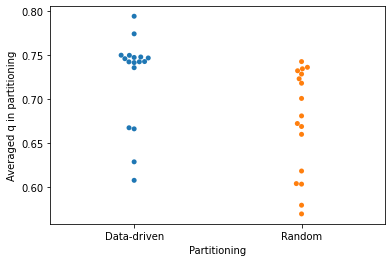

In [52]:
ax=sns.swarmplot(data=df, 
             x="variable", 
             y="value"
            )
ax.set_xticklabels(["Data-driven", "Random"])
ax.set_xlabel("Partitioning")
ax.set_ylabel("Averaged q in partitioning")